In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy 

In [150]:
data = pd.read_csv(r"C:\Users\C.S.SRUTHI\Downloads\Demand_forecast\dataset\train.csv")

In [151]:
data.head(10)

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.1,6.1
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,4.8,NaN
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,6.7,NaN
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,5.8,NaN
5,0x33e8,2017-01-03,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,NaN,No,8.1,NaN
6,0x2713,2017-01-04,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,6.6,NaN
7,0x33e9,2017-01-04,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,7.0,NaN
8,0x2714,2017-01-05,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,4.9,NaN
9,0x33ea,2017-01-05,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,NaN,7.4,NaN


In [152]:
feature_list= data.columns[:-2].values
print(feature_list)

['ID' 'date' 'warehouse_ID' 'Latitude' 'Longitude' 'Product_Type' 'year'
 'month' 'is_weekend' 'is_warehouse_closed']


In [153]:
data.describe()

,Latitude,Longitude,year,daily_dispatch_count,weekly_dispatch_count
count,16312.000000,16228.000000,16644.000000,16644.000000,2372.000000
mean,37.721350,-93.987807,2019.442802,5.042640,35.233938
std,7.403689,17.907439,1.058141,3.304978,20.953378
min,25.750156,-149.125259,2017.000000,0.000000,0.000000
25%,34.361664,-105.183060,2019.000000,2.800000,19.475000
50%,37.915825,-87.551186,2020.000000,4.400000,30.100000
75%,41.681471,-80.279640,2020.000000,7.500000,52.000000
max,61.600803,-72.794746,2021.000000,17.900000,96.400000


In [154]:
data['Product_Type'].value_counts()

Type_A    8688
Type_B    7956
Name: Product_Type, dtype: int64

In [155]:
data['year'].value_counts()

2020    6704
2019    4136
2018    2674
2021    2400
2017     730
Name: year, dtype: int64

Text(0, 0.5, 'count')

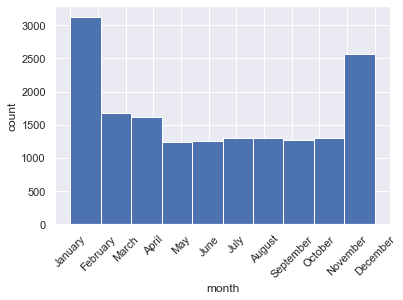

In [156]:
sns.set()
data.month.hist()
plt.xlabel('month')
plt.xticks(rotation=45)
plt.ylabel('count')

<AxesSubplot:>

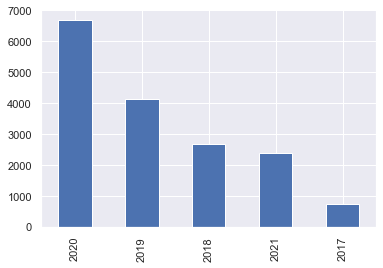

In [157]:
data['year'].value_counts().plot( kind='bar')

<AxesSubplot:>

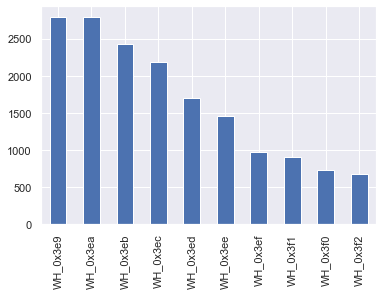

In [158]:
data['warehouse_ID'].value_counts().plot( kind='bar')

In [159]:
data.corr()

,Latitude,Longitude,year,daily_dispatch_count,weekly_dispatch_count
Latitude,1.000000,-0.570422,0.084478,0.001223,-0.001261
Longitude,-0.570422,1.000000,-0.119966,-0.086162,-0.096597
year,0.084478,-0.119966,1.000000,-0.480811,-0.528654
daily_dispatch_count,0.001223,-0.086162,-0.480811,1.000000,0.915725
weekly_dispatch_count,-0.001261,-0.096597,-0.528654,0.915725,1.000000


In [160]:
features= data.drop(['daily_dispatch_count','weekly_dispatch_count'], axis=1)
label1=data['daily_dispatch_count']
label2= data['weekly_dispatch_count']

In [161]:
features.isna().sum()

ID                       0
date                     0
warehouse_ID             0
Latitude               332
Longitude              416
Product_Type             0
year                     0
month                    0
is_weekend             499
is_warehouse_closed    166
dtype: int64

In [162]:
data.isna().sum()

ID                           0
date                         0
warehouse_ID                 0
Latitude                   332
Longitude                  416
Product_Type                 0
year                         0
month                        0
is_weekend                 499
is_warehouse_closed        166
daily_dispatch_count         0
weekly_dispatch_count    14272
dtype: int64

In [163]:
from datetime import datetime
def isweekend(date): 
    dt_obj = datetime.strptime(date, '%Y-%m-%d') 
    if dt_obj.weekday()==5 or  dt_obj.weekday()==6:
        return 1
    return 0

In [164]:
features['is_weekend_2']=features['date'].apply(isweekend)

In [165]:
features.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,is_weekend_2
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,1
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,1
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,0
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,0
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,0


In [166]:
fails=features['is_weekend']!=features['is_weekend_2']

In [167]:
fails.value_counts()

True    16644
dtype: int64

In [168]:
features=features.drop('is_weekend',axis=1)

In [169]:
features.isna().sum()

ID                       0
date                     0
warehouse_ID             0
Latitude               332
Longitude              416
Product_Type             0
year                     0
month                    0
is_warehouse_closed    166
is_weekend_2             0
dtype: int64

In [170]:
features[features["is_warehouse_closed"].isna()]

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_warehouse_closed,is_weekend_2
9,0x33ea,2017-01-05,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,NaN,0
87,0x3411,2017-02-13,WH_0x3ea,NaN,-105.183060,Type_A,2017,February,NaN,0
197,0x3448,2017-04-09,WH_0x3ea,38.749077,-105.183060,Type_A,2017,April,NaN,1
251,0x3463,2017-05-06,WH_0x3ea,38.749077,-105.183060,Type_A,2017,May,NaN,1
254,0x278f,2017-05-08,WH_0x3e9,41.681471,-72.794746,Type_A,2017,May,NaN,0
...,...,...,...,...,...,...,...,...,...,...
16347,0x3eb5,2021-04-16,WH_0x3ea,38.749077,NaN,Type_B,2021,April,NaN,0
16385,0x31e3,2021-04-18,WH_0x3e9,41.681471,-72.794746,Type_B,2021,April,NaN,1
16522,0x7940,2021-04-24,WH_0x3f2,61.600803,-149.125259,Type_A,2021,April,NaN,1
16562,0x7944,2021-04-26,WH_0x3f2,61.600803,-149.125259,Type_A,2021,April,NaN,0


In [171]:
import numpy as np 
features['is_warehouse_closed2'] = np.where(label1>0,0,1)

In [172]:
fails=features['is_warehouse_closed']!=features['is_warehouse_closed2']

In [173]:
fails.value_counts()

True    16644
dtype: int64

In [174]:
features=features.drop("is_warehouse_closed",axis=1)

In [175]:
features.isna().sum()

ID                        0
date                      0
warehouse_ID              0
Latitude                332
Longitude               416
Product_Type              0
year                      0
month                     0
is_weekend_2              0
is_warehouse_closed2      0
dtype: int64

In [176]:
features["warehouse_ID"].unique()

array(['WH_0x3e9', 'WH_0x3ea', 'WH_0x3eb', 'WH_0x3ec', 'WH_0x3ed',
       'WH_0x3ee', 'WH_0x3ef', 'WH_0x3f1', 'WH_0x3f0', 'WH_0x3f2'],
      dtype=object)

In [177]:
fts=features.drop(["Latitude" ,"Longitude"], axis=1)

In [178]:
fts.isna().sum()

ID                      0
date                    0
warehouse_ID            0
Product_Type            0
year                    0
month                   0
is_weekend_2            0
is_warehouse_closed2    0
dtype: int64

In [179]:
fts["Type_A"]=np.where(fts["Product_Type"]=="Type_A",1,0)
fts["Type_B"]=np.where(fts["Product_Type"]=="Type_B",1,0)

In [180]:
fts["Product_Type"].value_counts()

Type_A    8688
Type_B    7956
Name: Product_Type, dtype: int64

In [181]:
fts[fts["Type_B"]==1]

,ID,date,warehouse_ID,Product_Type,year,month,is_weekend_2,is_warehouse_closed2,Type_A,Type_B
733,0x287f,2018-01-02,WH_0x3e9,Type_B,2018,January,0,0,0,1
735,0x3555,2018-01-02,WH_0x3ea,Type_B,2018,January,0,0,0,1
737,0x40bd,2018-01-02,WH_0x3eb,Type_B,2018,January,0,0,0,1
739,0x2881,2018-01-03,WH_0x3e9,Type_B,2018,January,0,0,0,1
741,0x3557,2018-01-03,WH_0x3ea,Type_B,2018,January,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
16635,0x64dd,2021-04-30,WH_0x3ee,Type_B,2021,April,0,0,0,1
16637,0x6a91,2021-04-30,WH_0x3ef,Type_B,2021,April,0,0,0,1
16639,0x6f53,2021-04-30,WH_0x3f0,Type_B,2021,April,0,0,0,1
16641,0x74c9,2021-04-30,WH_0x3f1,Type_B,2021,April,0,0,0,1


In [182]:
fts=fts.drop("Product_Type",axis=1)

In [183]:
fts.dtypes

ID                      object
date                    object
warehouse_ID            object
year                     int64
month                   object
is_weekend_2             int64
is_warehouse_closed2     int32
Type_A                   int32
Type_B                   int32
dtype: object

In [184]:
fts.head()

,ID,date,warehouse_ID,year,month,is_weekend_2,is_warehouse_closed2,Type_A,Type_B
0,0x2710,2017-01-01,WH_0x3e9,2017,January,1,0,1,0
1,0x33e6,2017-01-01,WH_0x3ea,2017,January,1,0,1,0
2,0x2711,2017-01-02,WH_0x3e9,2017,January,0,0,1,0
3,0x33e7,2017-01-02,WH_0x3ea,2017,January,0,0,1,0
4,0x2712,2017-01-03,WH_0x3e9,2017,January,0,0,1,0


In [185]:
# create mapping
d = dict((v,k) for k,v in zip(range(1, 13), fts.month.unique()))
# create column
fts['month_index'] = fts['month'].map(d)

In [186]:
fts.drop("month",axis=1)

,ID,date,warehouse_ID,year,is_weekend_2,is_warehouse_closed2,Type_A,Type_B,month_index
0,0x2710,2017-01-01,WH_0x3e9,2017,1,0,1,0,1
1,0x33e6,2017-01-01,WH_0x3ea,2017,1,0,1,0,1
2,0x2711,2017-01-02,WH_0x3e9,2017,0,0,1,0,1
3,0x33e7,2017-01-02,WH_0x3ea,2017,0,0,1,0,1
4,0x2712,2017-01-03,WH_0x3e9,2017,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
16639,0x6f53,2021-04-30,WH_0x3f0,2021,0,0,0,1,4
16640,0x74c8,2021-04-30,WH_0x3f1,2021,0,0,1,0,4
16641,0x74c9,2021-04-30,WH_0x3f1,2021,0,0,0,1,4
16642,0x794c,2021-04-30,WH_0x3f2,2021,0,0,1,0,4


In [187]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(fts["warehouse_ID"].to_numpy().reshape(-1, 1))

<16644x10 sparse matrix of type '<class 'numpy.float64'>'
	with 16644 stored elements in Compressed Sparse Row format>

In [188]:
fts.tail()

,ID,date,warehouse_ID,year,month,is_weekend_2,is_warehouse_closed2,Type_A,Type_B,month_index
16639,0x6f53,2021-04-30,WH_0x3f0,2021,April,0,0,0,1,4
16640,0x74c8,2021-04-30,WH_0x3f1,2021,April,0,0,1,0,4
16641,0x74c9,2021-04-30,WH_0x3f1,2021,April,0,0,0,1,4
16642,0x794c,2021-04-30,WH_0x3f2,2021,April,0,0,1,0,4
16643,0x794d,2021-04-30,WH_0x3f2,2021,April,0,0,0,1,4


In [189]:
fts=fts.drop('month',axis=1)

In [190]:
fts.dtypes

ID                      object
date                    object
warehouse_ID            object
year                     int64
is_weekend_2             int64
is_warehouse_closed2     int32
Type_A                   int32
Type_B                   int32
month_index              int64
dtype: object

In [191]:
fts["date"] = pd.to_datetime(fts["date"], format = '%Y-%m-%d')

In [192]:
fts.dtypes

ID                              object
date                    datetime64[ns]
warehouse_ID                    object
year                             int64
is_weekend_2                     int64
is_warehouse_closed2             int32
Type_A                           int32
Type_B                           int32
month_index                      int64
dtype: object

In [193]:
data["year"].value_counts()

2020    6704
2019    4136
2018    2674
2021    2400
2017     730
Name: year, dtype: int64

Text(0, 0.5, 'count')

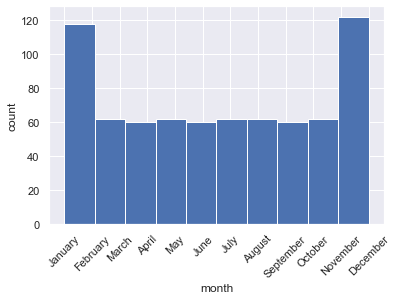

In [194]:
y_2017=data[data["year"]==2017]
sns.set()
y_2017.month.hist()
plt.xlabel('month')
plt.xticks(rotation=45)
plt.ylabel('count')

Text(0, 0.5, 'count')

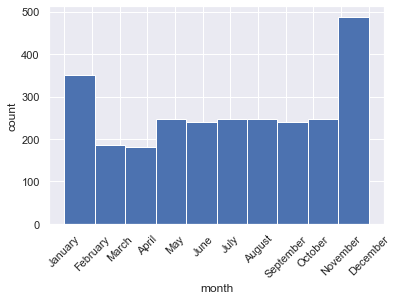

In [195]:
y_2018=data[data["year"]==2018]
sns.set()
y_2018.month.hist()
plt.xlabel('month')
plt.xticks(rotation=45)
plt.ylabel('count')

Text(0, 0.5, 'count')

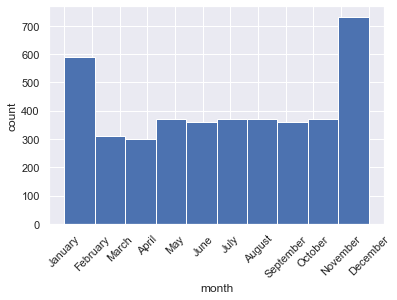

In [196]:
y_2019=data[data["year"]==2019]
sns.set()
y_2019.month.hist()
plt.xlabel('month')
plt.xticks(rotation=45)
plt.ylabel('count')

In [197]:
fts["date2"]=fts["date"].dt.day 

In [198]:
fts.head()

,ID,date,warehouse_ID,year,is_weekend_2,is_warehouse_closed2,Type_A,Type_B,month_index,date2
0,0x2710,2017-01-01,WH_0x3e9,2017,1,0,1,0,1,1
1,0x33e6,2017-01-01,WH_0x3ea,2017,1,0,1,0,1,1
2,0x2711,2017-01-02,WH_0x3e9,2017,0,0,1,0,1,2
3,0x33e7,2017-01-02,WH_0x3ea,2017,0,0,1,0,1,2
4,0x2712,2017-01-03,WH_0x3e9,2017,0,0,1,0,1,3


In [199]:
fts=fts.drop("date",axis=1)

In [200]:
fts.head()

,ID,warehouse_ID,year,is_weekend_2,is_warehouse_closed2,Type_A,Type_B,month_index,date2
0,0x2710,WH_0x3e9,2017,1,0,1,0,1,1
1,0x33e6,WH_0x3ea,2017,1,0,1,0,1,1
2,0x2711,WH_0x3e9,2017,0,0,1,0,1,2
3,0x33e7,WH_0x3ea,2017,0,0,1,0,1,2
4,0x2712,WH_0x3e9,2017,0,0,1,0,1,3


In [201]:
months_in_a_year = 12
fts['sin_month'] = np.sin(2*np.pi*fts.month_index/months_in_a_year)
fts['cos_month'] = np.cos(2*np.pi*fts.month_index/months_in_a_year)

In [202]:
days_in_a_month = 31

fts['sin_day'] = np.sin(2*np.pi*fts.date2/days_in_a_month)
fts['cos_day'] = np.cos(2*np.pi*fts.date2/days_in_a_month)

In [203]:
fts.describe()

,year,is_weekend_2,is_warehouse_closed2,Type_A,Type_B,month_index,date2,sin_month,cos_month,sin_day,cos_day
count,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,1.664400e+04,1.664400e+04,1.664400e+04,16644.000000
mean,2019.442802,0.284787,0.067712,0.521990,0.478010,6.203437,15.730233,6.136660e-02,1.688635e-02,1.335753e-03,-0.020395
std,1.058141,0.451327,0.251259,0.499531,0.499531,3.498149,8.783902,7.160708e-01,6.951629e-01,7.140256e-01,0.699864
min,2017.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00,-9.987165e-01,-0.994869
25%,2019.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.000000,-5.000000e-01,-5.000000e-01,-7.247928e-01,-0.758758
50%,2020.000000,0.000000,0.000000,1.000000,0.000000,6.000000,16.000000,1.224647e-16,6.123234e-17,-2.449294e-16,-0.050649
75%,2020.000000,1.000000,0.000000,1.000000,1.000000,9.000000,23.000000,8.660254e-01,8.660254e-01,7.247928e-01,0.688967
max,2021.000000,1.000000,1.000000,1.000000,1.000000,12.000000,31.000000,1.000000e+00,1.000000e+00,9.987165e-01,1.000000


In [204]:
fts.head()

,ID,warehouse_ID,year,is_weekend_2,is_warehouse_closed2,Type_A,Type_B,month_index,date2,sin_month,cos_month,sin_day,cos_day
0,0x2710,WH_0x3e9,2017,1,0,1,0,1,1,0.5,0.866025,0.201299,0.979530
1,0x33e6,WH_0x3ea,2017,1,0,1,0,1,1,0.5,0.866025,0.201299,0.979530
2,0x2711,WH_0x3e9,2017,0,0,1,0,1,2,0.5,0.866025,0.394356,0.918958
3,0x33e7,WH_0x3ea,2017,0,0,1,0,1,2,0.5,0.866025,0.394356,0.918958
4,0x2712,WH_0x3e9,2017,0,0,1,0,1,3,0.5,0.866025,0.571268,0.820763


In [205]:
fts.drop(["month_index","date2"],axis=1)

,ID,warehouse_ID,year,is_weekend_2,is_warehouse_closed2,Type_A,Type_B,sin_month,cos_month,sin_day,cos_day
0,0x2710,WH_0x3e9,2017,1,0,1,0,0.500000,0.866025,0.201299,0.979530
1,0x33e6,WH_0x3ea,2017,1,0,1,0,0.500000,0.866025,0.201299,0.979530
2,0x2711,WH_0x3e9,2017,0,0,1,0,0.500000,0.866025,0.394356,0.918958
3,0x33e7,WH_0x3ea,2017,0,0,1,0,0.500000,0.866025,0.394356,0.918958
4,0x2712,WH_0x3e9,2017,0,0,1,0,0.500000,0.866025,0.571268,0.820763
...,...,...,...,...,...,...,...,...,...,...,...
16639,0x6f53,WH_0x3f0,2021,0,0,0,1,0.866025,-0.500000,-0.201299,0.979530
16640,0x74c8,WH_0x3f1,2021,0,0,1,0,0.866025,-0.500000,-0.201299,0.979530
16641,0x74c9,WH_0x3f1,2021,0,0,0,1,0.866025,-0.500000,-0.201299,0.979530
16642,0x794c,WH_0x3f2,2021,0,0,1,0,0.866025,-0.500000,-0.201299,0.979530


In [211]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoded = pd.get_dummies(fts["warehouse_ID"])

In [212]:
result = pd.concat([one_hot_encoded,fts],axis=1)

In [213]:
display(result)

,WH_0x3e9,WH_0x3ea,WH_0x3eb,WH_0x3ec,WH_0x3ed,WH_0x3ee,WH_0x3ef,WH_0x3f0,WH_0x3f1,WH_0x3f2,...,is_weekend_2,is_warehouse_closed2,Type_A,Type_B,month_index,date2,sin_month,cos_month,sin_day,cos_day
0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0.500000,0.866025,0.201299,0.979530
1,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0.500000,0.866025,0.201299,0.979530
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2,0.500000,0.866025,0.394356,0.918958
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2,0.500000,0.866025,0.394356,0.918958
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,3,0.500000,0.866025,0.571268,0.820763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16639,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,4,30,0.866025,-0.500000,-0.201299,0.979530
16640,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,4,30,0.866025,-0.500000,-0.201299,0.979530
16641,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,4,30,0.866025,-0.500000,-0.201299,0.979530
16642,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,4,30,0.866025,-0.500000,-0.201299,0.979530


In [216]:
result.dtypes

WH_0x3e9                  uint8
WH_0x3ea                  uint8
WH_0x3eb                  uint8
WH_0x3ec                  uint8
WH_0x3ed                  uint8
WH_0x3ee                  uint8
WH_0x3ef                  uint8
WH_0x3f0                  uint8
WH_0x3f1                  uint8
WH_0x3f2                  uint8
ID                       object
warehouse_ID             object
year                      int64
is_weekend_2              int64
is_warehouse_closed2      int32
Type_A                    int32
Type_B                    int32
month_index               int64
date2                     int64
sin_month               float64
cos_month               float64
sin_day                 float64
cos_day                 float64
dtype: object

In [218]:
result=result.drop("warehouse_ID",axis=1)

In [219]:
fdata=result.drop("ID",axis=1)

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fdata, label1, test_size=0.3, shuffle=False)

In [221]:
X_train.head()

,WH_0x3e9,WH_0x3ea,WH_0x3eb,WH_0x3ec,WH_0x3ed,WH_0x3ee,WH_0x3ef,WH_0x3f0,WH_0x3f1,WH_0x3f2,...,is_weekend_2,is_warehouse_closed2,Type_A,Type_B,month_index,date2,sin_month,cos_month,sin_day,cos_day
0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0.5,0.866025,0.201299,0.979530
1,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0.5,0.866025,0.201299,0.979530
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2,0.5,0.866025,0.394356,0.918958
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2,0.5,0.866025,0.394356,0.918958
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,3,0.5,0.866025,0.571268,0.820763


In [223]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [224]:
y_pred=model1.predict(X_test)

In [225]:
y_pred

array([8.8671875 , 4.38085938, 7.63476562, ..., 2.6171875 , 7.03515625,
       2.54882812])

In [226]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

6.299919748730216

In [244]:
y_test,y_pred

(11650     7.1
 11651     2.6
 11652     4.8
 11653     3.1
 11654     3.9
          ... 
 16639     0.2
 16640    12.3
 16641     3.3
 16642     7.1
 16643     3.4
 Name: daily_dispatch_count, Length: 4994, dtype: float64,
 array([8.8671875 , 4.38085938, 7.63476562, ..., 2.6171875 , 7.03515625,
        2.54882812]))